<a href="https://colab.research.google.com/github/chessaanugrah/DataMiningPortofolio./blob/main/fraud_dtec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install category_encoders

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")

Import Dataset

In [5]:
# Membaca dataset dari file yang diupload

df = pd.read_csv('/content/drive/MyDrive/collabskripsi/Datset2/fraudTest.csv')

In [6]:
# Membaca dataset dari file yang diupload

df = pd.read_csv('/content/drive/MyDrive/collabskripsi/Datset2/fraudTrain.csv')

EDA

In [7]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [9]:
df.shape


(1296675, 23)

In [10]:
is_fraud = df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])

Yes:  7506
No:  1289169


In [11]:
print(df.isna().sum().sum())
print(df.duplicated().sum())

0
0


Tabel perbandingan penipuan laki laki dengan perempuan

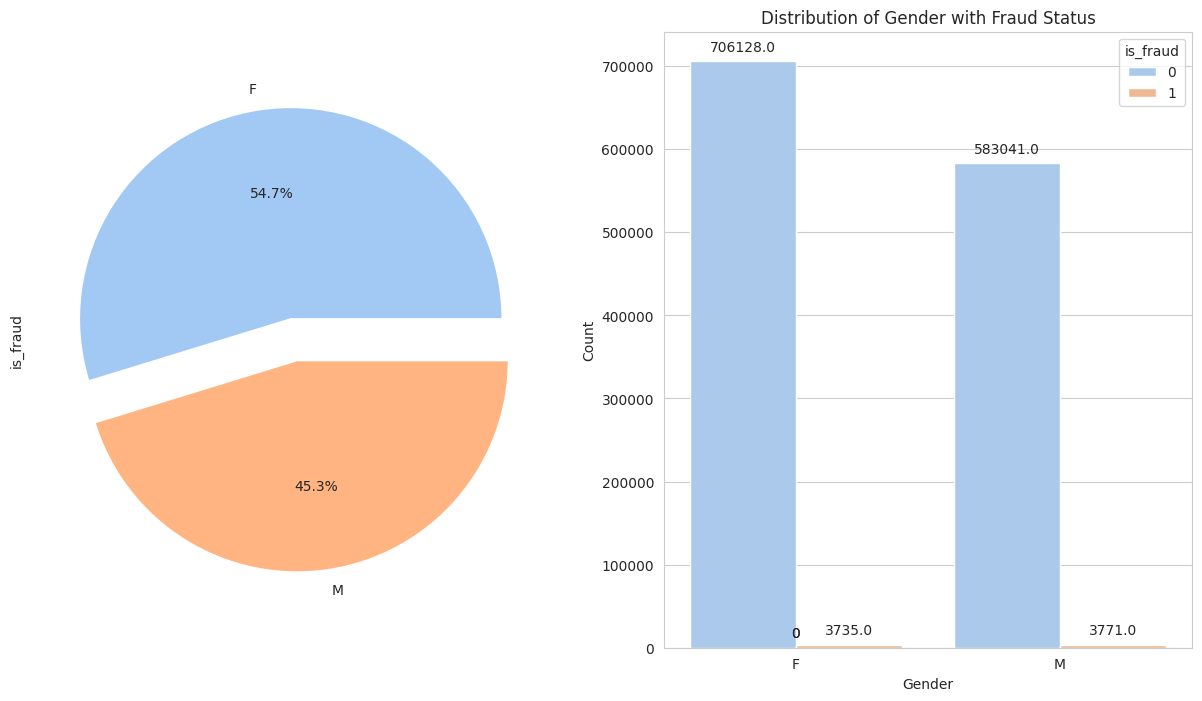

In [12]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

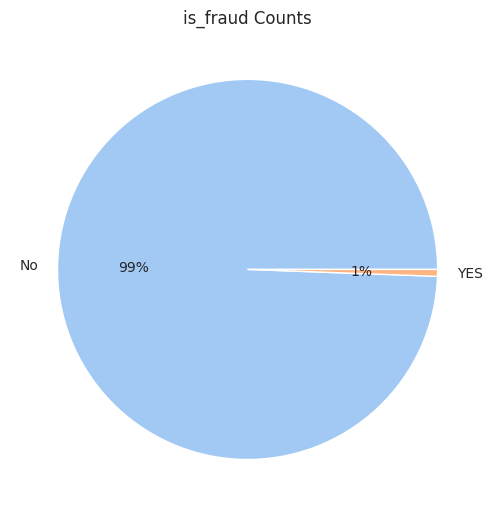

In [13]:
is_fraud = df["is_fraud"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(is_fraud, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Future engginering

In [14]:
#Change date type from obj to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'],format='mixed')

In [15]:
df['hour'] = df['trans_date_trans_time'].dt.hour
df['hour'] = df['trans_date_trans_time'].dt.hour

df['month'] = df['trans_date_trans_time'].dt.month
df['month'] = df['trans_date_trans_time'].dt.month

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


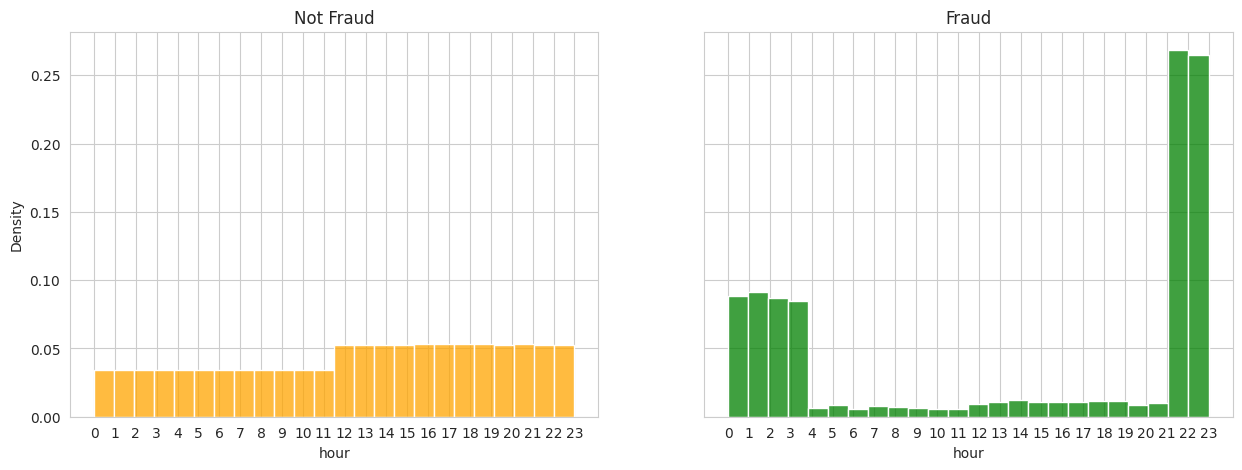

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=df[df["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1, color="orange")

ax2 = sns.histplot(x='hour', data=df[df["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="green")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")
ax1.set_xticks(np.arange(24)) # ticks of the day 0 -> 23
ax2.set_xticks(np.arange(24));


Preprocesing

In [17]:
unique_transaction_count = len(df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 1296675


In [18]:

df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


In [19]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [21]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1


In [22]:
df.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,352,481,2,983,894,51,494,968,1296675
top,Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1


Data Encoding

In [23]:
import numpy as np

def calculate_woe(data, target, feature):
    """
    Calculate Weight of Evidence (WOE) and return a mapping.
    """
    temp = data[[feature, target]].copy()
    temp['total'] = 1
    grouped = temp.groupby(feature).agg({
        target: 'sum',
        'total': 'count'
    }).reset_index()
    grouped['non_target'] = grouped['total'] - grouped[target]

    # Add a small value to avoid division by zero and inf values
    grouped['non_target'] = grouped['non_target'].replace(0, 1e-6)
    grouped[target] = grouped[target].replace(0, 1e-6)

    grouped['woe'] = np.log(
        (grouped['non_target'] / grouped['non_target'].sum()) /
        (grouped[target] / grouped[target].sum())
    )
    return grouped[[feature, 'woe']].set_index(feature).to_dict()['woe']

# Apply WOE encoding manually
for col in ['job', 'merchant', 'category', 'lat', 'last']:
    woe_map = calculate_woe(df, 'is_fraud', col)
    df[col] = df[col].map(woe_map)

In [24]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,-0.906324,-0.924103,4.97,Jennifer,16.284266,F,561 Perry Cove,...,3495,1.233790,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,-0.627488,-0.898498,107.23,Stephanie,0.790826,F,43039 Riley Greens Suite 393,...,149,0.990694,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,1.012516,0.851629,220.11,Edward,-0.417664,M,594 White Dale Suite 530,...,4154,-1.004902,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,0.521529,0.210727,45.00,Jeremy,-0.128348,M,9443 Cynthia Court Apt. 038,...,1939,-0.313745,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,0.431161,0.614805,41.96,Tyler,-0.411388,M,408 Bradley Rest,...,99,16.278827,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


balancing data

In [25]:
# Separate features (X) and target (y)
X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with the name of your target column
y = df['is_fraud']  # Target column

Original Training Data Shape: (1037340, 16) (1037340,)
SMOTE Resampled Training Data Shape: (2062670, 16) (2062670,)
Test Data Shape: (259335, 16) (259335,)


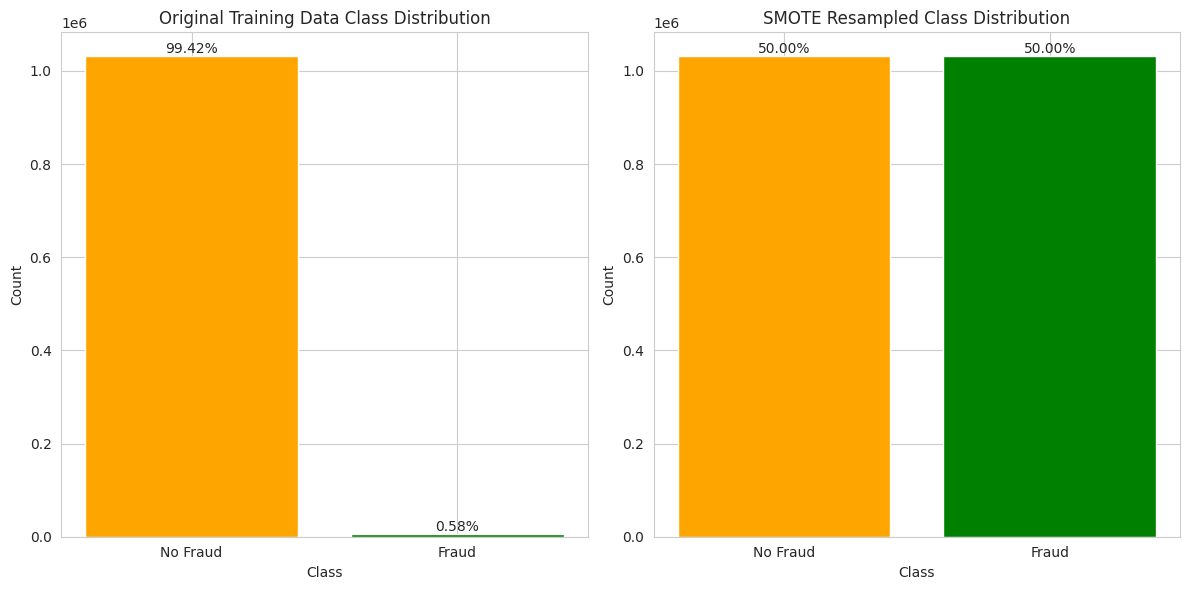

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Import SMOTE
import numpy as np


# Ensure only numeric columns remain
X = X.select_dtypes(include=[np.number])  # Select only numerical columns

# Split data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Apply SMOTE to the training set
smote = SMOTE(random_state=65)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scaling numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Check the shape to ensure correctness
print("Original Training Data Shape:", X_train.shape, y_train.shape)
print("SMOTE Resampled Training Data Shape:", X_train_smote.shape, y_train_smote.shape)
print("Test Data Shape:", X_test.shape, y_test.shape)

# Count the occurrences of each class after SMOTE
original_class_counts = y_train.value_counts()
smote_class_counts = y_train_smote.value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(y_train) * 100
smote_percentages = smote_class_counts / len(y_train_smote) * 100

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for SMOTE class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(smote_class_counts.index, smote_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, smote_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(smote_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [27]:
# Menghitung distribusi label untuk data pelatihan asli
original_class_counts = y_train.value_counts()
original_percentages = original_class_counts / len(y_train) * 100

# Menghitung distribusi label untuk data pelatihan setelah SMOTE
smote_class_counts = y_train_smote.value_counts()
smote_percentages = smote_class_counts / len(y_train_smote) * 100

# Menghitung distribusi label untuk data pengujian
test_class_counts = y_test.value_counts()
test_percentages = test_class_counts / len(y_test) * 100

# Menampilkan hasil
print("Original Training Data Class Distribution:")
print(original_class_counts)
print("Original Training Data Class Percentages:")
print(original_percentages)

print("\nSMOTE Resampled Training Data Class Distribution:")
print(smote_class_counts)
print("SMOTE Resampled Training Data Class Percentages:")
print(smote_percentages)

print("\nTest Data Class Distribution:")
print(test_class_counts)
print("Test Data Class Percentages:")
print(test_percentages)

Original Training Data Class Distribution:
is_fraud
0    1031335
1       6005
Name: count, dtype: int64
Original Training Data Class Percentages:
is_fraud
0    99.421116
1     0.578884
Name: count, dtype: float64

SMOTE Resampled Training Data Class Distribution:
is_fraud
0    1031335
1    1031335
Name: count, dtype: int64
SMOTE Resampled Training Data Class Percentages:
is_fraud
0    50.0
1    50.0
Name: count, dtype: float64

Test Data Class Distribution:
is_fraud
0    257834
1      1501
Name: count, dtype: int64
Test Data Class Percentages:
is_fraud
0    99.421212
1     0.578788
Name: count, dtype: float64


In [28]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Misalkan df adalah DataFrame yang berisi data Anda
# df = pd.read_csv('data.csv')  # Ganti dengan cara Anda membaca data

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Menghitung statistik dasar
stats = numeric_df.describe().T  # Transpose untuk memudahkan pembacaan
stats['skew'] = numeric_df.apply(skew)  # Menghitung skewness
stats['kurtosis'] = numeric_df.apply(kurtosis)  # Menghitung kurtosis

# Menyusun DataFrame untuk menampilkan hasil
characteristics = stats[['mean', 'min', 'max', 'std', 'skew', 'kurtosis']]
characteristics.columns = ['MEAN', 'MIN', 'MAX', 'STD', 'SKEW', 'KURTOSIS']

# Menampilkan hasil
print("Deskripsi Karakteristik Data:")
print(characteristics)

Deskripsi Karakteristik Data:
                    MEAN           MIN           MAX           STD  \
Unnamed: 0  6.483370e+05  0.000000e+00  1.296674e+06  3.743180e+05   
cc_num      4.171920e+17  6.041621e+10  4.992346e+18  1.308806e+18   
merchant    6.382513e-01 -1.511759e+00  1.649869e+01  2.023497e+00   
category    3.791714e-01 -1.121721e+00  1.322745e+00  8.443565e-01   
amt         7.035104e+01  1.000000e+00  2.894890e+04  1.603160e+02   
last        1.091980e+00 -2.190600e+01  1.671184e+01  3.876072e+00   
zip         4.880067e+04  1.257000e+03  9.978300e+04  2.689322e+04   
lat         3.867207e+00 -2.190600e+01  1.671601e+01  6.910806e+00   
long       -9.022634e+01 -1.656723e+02 -6.795030e+01  1.375908e+01   
city_pop    8.882444e+04  2.300000e+01  2.906700e+06  3.019564e+05   
job         1.297043e+00 -2.190600e+01  1.739594e+01  4.265703e+00   
unix_time   1.349244e+09  1.325376e+09  1.371817e+09  1.284128e+07   
merch_lat   3.853734e+01  1.902779e+01  6.751027e+01  5.1097

Modeling data

Logistic Regression -> LR

In [29]:
from sklearn.metrics import classification_report, accuracy_score

# Melatih model Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Membuat prediksi pada data test
predict_LR = LR_model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, predict_LR))

# Menghitung akurasi model
LR_accuracy = accuracy_score(predict_LR, y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))


              precision    recall  f1-score   support

           0       0.99      0.51      0.67    257834
           1       0.01      0.50      0.01      1501

    accuracy                           0.51    259335
   macro avg       0.50      0.50      0.34    259335
weighted avg       0.99      0.51      0.67    259335

Logistic Regression accuracy is: 50.99%


Support Vector Machine SVM

In [30]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
predict = svm_model.predict(X_test)

print(classification_report(y_test, predict))
svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      0.09      0.17    257834
           1       0.01      0.91      0.01      1501

    accuracy                           0.10    259335
   macro avg       0.50      0.50      0.09    259335
weighted avg       0.99      0.10      0.17    259335

SVC model accuracy is: 9.66%


GaussianNB

In [31]:
# Create and train the Gaussian Naive Bayes model
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_naive = NB_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_naive))
GaussianNB_accuracy = accuracy_score(y_pred_naive, y_test)
print('Naive Bayes model accuracy is: {:.2f}%'.format(GaussianNB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Naive Bayes model accuracy is: 99.42%


Decission Tree

In [32]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_DecisionTree = DT.predict(X_test)
print(classification_report(y_test, predict_DecisionTree))
DT_accuracy = accuracy_score(predict_DecisionTree,y_test)
print('DT model accuracy is: {:.2f}%'.format(DT_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

DT model accuracy is: 99.42%


Random Forest

In [33]:
# Initialize and train the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)
RF.fit(X_train, y_train)

predict_RF = RF.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    257834
           1       0.01      0.06      0.01      1501

    accuracy                           0.94    259335
   macro avg       0.50      0.50      0.49    259335
weighted avg       0.99      0.94      0.96    259335

Random Forest model accuracy is: 94.27%


XGBoost

In [34]:
# Initialize and train the XGBoost classifier
XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)

# Make predictions on the test set
predict_XGB = XGB.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predict_XGB))
XGB_accuracy = accuracy_score(predict_XGB, y_test)
print('XGBoost model accuracy is: {:.2f}%'.format(XGB_accuracy * 100))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97    257834
           1       0.01      0.06      0.01      1501

    accuracy                           0.93    259335
   macro avg       0.50      0.50      0.49    259335
weighted avg       0.99      0.93      0.96    259335

XGBoost model accuracy is: 93.38%


In [35]:
Algorithms = ['XGBClassifier', 'RandomForest', 'DecissionTree', 'Logistic Regression', 'SVC', 'GaussianNB']
accuracy = [XGB_accuracy, RF_accuracy, DT_accuracy, LR_accuracy, svm_accuracy, GaussianNB_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,XGBClassifier,0.933754
1,RandomForest,0.942719
2,DecissionTree,0.994212
3,Logistic Regression,0.509866
4,SVC,0.096643
5,GaussianNB,0.994212


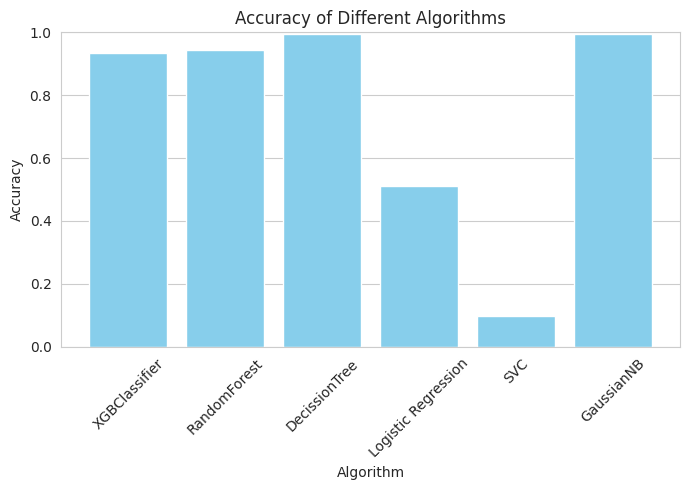

In [36]:
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Hyperparametertuning

In [37]:
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5)
log_reg_grid.fit(X_train, y_train)
best_log_reg = log_reg_grid.best_estimator_

In [38]:
# 2. Decision Tree (ID3)
dt_params = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

In [39]:
# 3. Naïve Bayes (GaussianNB) (tidak banyak parameter untuk tuning)
best_nb = GaussianNB()
best_nb.fit(X_train, y_train)

GaussianNB()

In [40]:
# 4. XGBoost
from xgboost import XGBClassifier
xgb_params = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 10]}
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

In [41]:
# 5. Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_params = {'C': [0.1, 1], 'kernel': ['linear']}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

KeyboardInterrupt: 

In [42]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf_params = {
    'n_estimators': [10, 50],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_smote, y_train_smote)
best_rf = rf_grid.best_estimator_

Akurasi Setelah Hyperparameter tuning

In [46]:
# Membuat DataFrame untuk menampilkan hasil
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Akurasi Setelah Tuning'])
print(accuracy_df)

                 Model  Akurasi Setelah Tuning
0  Logistic Regression                0.096643
1        Decision Tree                0.893424
2        Random Forest                0.974485
3          Naïve Bayes                0.994212
4              XGBoost                0.918715


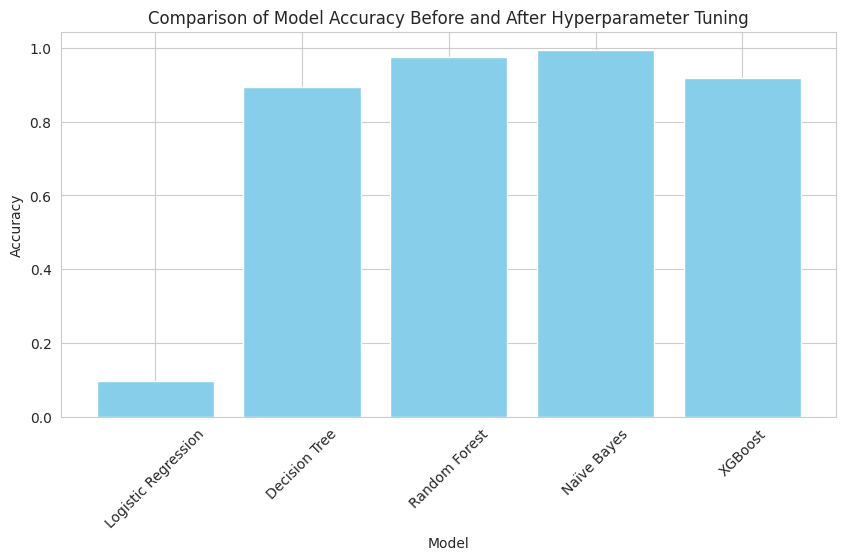

In [43]:
# Evaluasi model setelah tuning
models = {'Logistic Regression': best_log_reg, 'Decision Tree': best_dt, 'Random Forest': best_rf,
           'Naïve Bayes': best_nb, 'XGBoost': best_xgb}

accuracy_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

# Plot perbandingan sebelum dan sesudah tuning
plt.figure(figsize=(10, 5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy Before and After Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.show()
